# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [249]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import folium
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
import pickle

In [194]:
# Example importing the CSV here
url='https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv'
df=pd.read_csv(url, sep=';')
df.shape

(41188, 21)

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

hacer boxplot.
Age, job (la corvertiremos en numérica), estado marital, educación, default todas las vamos a convertir a categóricas.
month: puede ser q influya o no
duration es importante pero ya es nnumérica.
pdays: se podría eliminar, porque es rara la varible. se puede sacar los outliers.
poutcome también hay q convertirlas.
y también la tengo q pasar a numérica.

Variable super alta le cambiamos a log.


In [196]:
df.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
9012,43,admin.,married,professional.course,no,yes,no,telephone,jun,thu,...,2,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,no
23202,36,technician,married,professional.course,no,no,no,cellular,aug,tue,...,5,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
2224,46,admin.,divorced,university.degree,unknown,no,no,telephone,may,mon,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
17116,60,retired,married,high.school,unknown,yes,no,cellular,jul,fri,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
21523,37,technician,married,high.school,no,no,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
4125,29,technician,single,university.degree,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no
34468,24,self-employed,single,university.degree,no,no,no,cellular,may,thu,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.266,5099.1,no
25988,32,self-employed,married,university.degree,no,yes,no,cellular,nov,wed,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no
38229,77,retired,divorced,unknown,no,no,no,cellular,oct,thu,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.741,5017.5,no
38289,37,technician,married,university.degree,no,yes,no,cellular,oct,wed,...,1,999,1,failure,-3.4,92.431,-26.9,0.742,5017.5,yes


In [197]:
num_cols = df.select_dtypes(['int', 'float']).columns

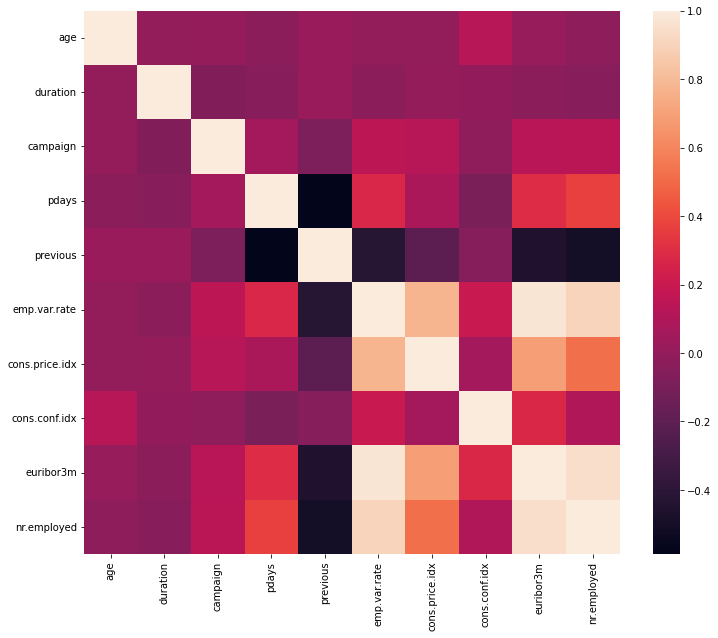

In [198]:
fig = plt.figure(figsize=(12,10))
cor_matrix = pd.concat([df[num_cols]], axis = 1).corr()
sns.heatmap(cor_matrix)
plt.show()

In [199]:
#Filas duplicadas
df2 = df.drop_duplicates(keep='first')
df2

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [200]:
num_vars = df.columns[df.dtypes != 'object']
cat_vars = df.columns[df.dtypes == 'object']

print("Numerical variables:", num_vars)
print("Categorical variables:", cat_vars)

Numerical variables: Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')
Categorical variables: Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')


In [201]:
df[num_vars].isnull().sum().sort_values(ascending=False)

age               0
duration          0
campaign          0
pdays             0
previous          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

In [202]:
df[cat_vars].isnull().sum().sort_values(ascending=False)

job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
poutcome       0
y              0
dtype: int64

Variables que tienen unknown:


In [203]:
df.isin(['unknown']).any()


age               False
job                True
marital            True
education          True
default            True
housing            True
loan               True
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

In [204]:
df['education'].mode()

0    university.degree
Name: education, dtype: object

In [205]:
categorical=(['job', 'marital', 'education', 'default', 'housing', 'loan'])
for i in categorical:
    df[i] = df[i].replace(['unknown'],df[i].mode())
df.isin(['unknown']).any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

In [206]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


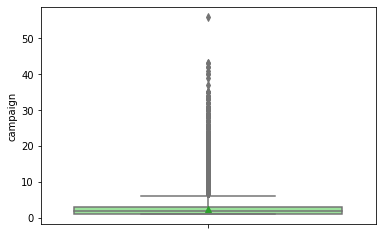

In [207]:
sns.boxplot(y=df['campaign'],  color='lightgreen', showmeans=True);


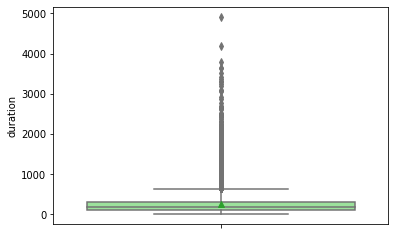

In [208]:
sns.boxplot(y=df['duration'],  color='lightgreen', showmeans=True);

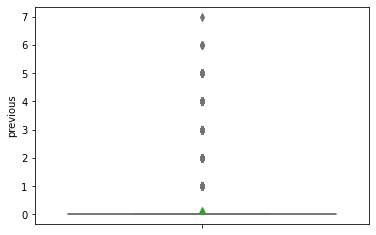

In [209]:
sns.boxplot(y=df['previous'],  color='lightgreen', showmeans=True);

In [210]:
for i in ['campaign','previous','duration']:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    S = 1.5*IQR
    UB = Q3 + S
    df.loc[df[i]>Q3,i] = IQR

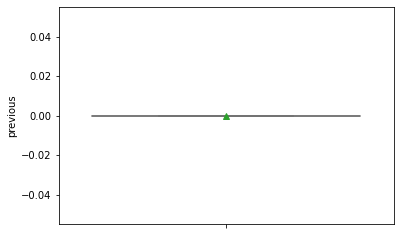

In [211]:
sns.boxplot(y=df['previous'],  color='lightgreen', showmeans=True);

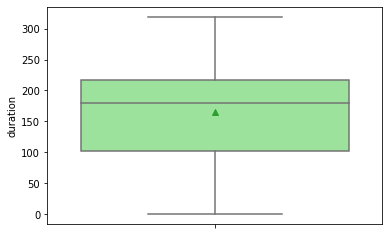

In [212]:
sns.boxplot(y=df['duration'],  color='lightgreen', showmeans=True);

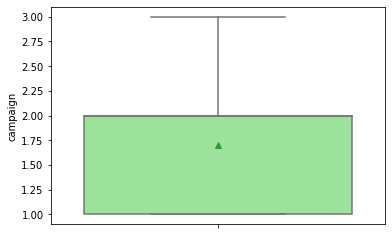

In [213]:
sns.boxplot(y=df['campaign'],  color='lightgreen', showmeans=True);

In [214]:
df['education'].value_counts()

university.degree      13899
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
illiterate                18
Name: education, dtype: int64

In [215]:
#df.loc[df['education']=='basic.9y','education'] ='middle_school'
#df.loc[df['education']=='basic.6y','education'] = 'middle_school'
#df.loc[df['education']=='basic.4y','education'] = 'middle_school'
df['education'].value_counts()

university.degree      13899
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
illiterate                18
Name: education, dtype: int64

In [216]:
df['y'].value_counts()


no     36548
yes     4640
Name: y, dtype: int64

In [217]:
df.loc[df['y']=='yes','y'] = 1
df.loc[df['y']=='no','y'] = 0

In [218]:
df['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [219]:
#pd.cut(df['age'],[)
df['Age'] = pd.cut(x=df['age'], bins=[10,20,30,40,50,60,70,80,90,100])
df['Age']

0        (50, 60]
1        (50, 60]
2        (30, 40]
3        (30, 40]
4        (50, 60]
           ...   
41183    (70, 80]
41184    (40, 50]
41185    (50, 60]
41186    (40, 50]
41187    (70, 80]
Name: Age, Length: 41188, dtype: category
Categories (9, interval[int64, right]): [(10, 20] < (20, 30] < (30, 40] < (40, 50] ... (60, 70] < (70, 80] < (80, 90] < (90, 100]]

Eliminar outliers

In [220]:
df['age'].describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

In [221]:
fig=px.box(df, y='age')
fig.show()

In [222]:
df= df[(df['age']>=25) & (df['age']<=47)]

In [223]:
df['age'].describe()

count    30247.000000
mean        35.829140
std          5.873079
min         25.000000
25%         31.000000
50%         35.000000
75%         40.000000
max         47.000000
Name: age, dtype: float64

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30247 entries, 2 to 41186
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             30247 non-null  int64   
 1   job             30247 non-null  object  
 2   marital         30247 non-null  object  
 3   education       30247 non-null  object  
 4   default         30247 non-null  object  
 5   housing         30247 non-null  object  
 6   loan            30247 non-null  object  
 7   contact         30247 non-null  object  
 8   month           30247 non-null  object  
 9   day_of_week     30247 non-null  object  
 10  duration        30247 non-null  int64   
 11  campaign        30247 non-null  int64   
 12  pdays           30247 non-null  int64   
 13  previous        30247 non-null  int64   
 14  poutcome        30247 non-null  object  
 15  emp.var.rate    30247 non-null  float64 
 16  cons.price.idx  30247 non-null  float64 
 17  cons.conf.id

In [225]:
df['job'].value_counts()

admin.           8604
blue-collar      7107
technician       5408
services         3099
management       1993
self-employed    1077
entrepreneur     1023
unemployed        749
housemaid         607
student           497
retired            83
Name: job, dtype: int64

Encode Variables


In [226]:
encoder = LabelEncoder()

df['Age'] = encoder.fit_transform(df['Age'])
df['education'] = encoder.fit_transform(df['education'])
df.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Age
2855,35,services,married,3,no,no,no,telephone,may,wed,...,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0,1
4691,37,services,single,3,no,no,no,telephone,may,wed,...,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,0,1
32309,43,blue-collar,married,2,no,no,no,cellular,may,fri,...,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0,2
26564,33,services,married,3,no,yes,no,cellular,nov,thu,...,999,0,failure,-0.1,93.200,-42.0,4.076,5195.8,0,1
12043,33,services,married,3,no,no,no,telephone,jun,fri,...,999,0,nonexistent,1.4,94.465,-41.8,4.947,5228.1,0,1
7371,38,blue-collar,married,2,no,yes,yes,telephone,may,fri,...,999,0,nonexistent,1.1,93.994,-36.4,4.864,5191.0,0,1
20012,45,management,married,6,no,yes,no,cellular,aug,fri,...,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,0,2
30525,31,student,single,6,no,no,yes,cellular,may,mon,...,999,0,nonexistent,-1.8,92.893,-46.2,1.354,5099.1,0,1
25875,33,management,married,6,no,yes,no,cellular,nov,wed,...,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,0,1
5577,36,admin.,married,6,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1


In [227]:
df = pd.get_dummies(df, columns = ['job', 'marital', 'default','housing', 'loan', 'contact', 'poutcome'])
df.sample(10)

,age,education,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,...,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
11038,33,0,jun,wed,313,2,999,0,1.4,94.465,...,0,0,1,1,0,0,1,0,1,0
13994,42,6,jul,fri,249,2,999,0,1.4,93.918,...,0,0,1,1,0,1,0,0,1,0
19710,44,6,aug,thu,107,3,999,0,1.4,93.444,...,0,1,0,1,0,1,0,0,1,0
17133,32,0,jul,fri,110,1,999,0,1.4,93.918,...,0,1,0,1,0,0,1,0,1,0
30083,38,6,apr,fri,202,2,999,0,-1.8,93.075,...,0,1,0,1,0,1,0,1,0,0
14591,32,6,jul,tue,217,1,999,0,1.4,93.918,...,0,0,1,1,0,1,0,0,1,0
1030,32,0,may,wed,217,2,999,0,1.1,93.994,...,0,1,0,1,0,0,1,0,1,0
39070,36,6,dec,fri,52,2,999,0,-3.0,92.713,...,0,0,1,1,0,0,1,0,1,0
18438,36,6,jul,thu,28,1,999,0,1.4,93.918,...,0,0,1,1,0,0,1,0,1,0
21699,31,6,aug,tue,109,3,999,0,1.4,93.444,...,0,1,0,1,0,1,0,0,1,0


In [228]:
month_dict={'may':5,'jul':7,'aug':8,'jun':6,'nov':11,'apr':4,'oct':10,'sep':9,'mar':3,'dec':12}
df['month']= df['month'].map(month_dict) 

day_dict={'thu':5,'mon':2,'wed':4,'tue':3,'fri':6}
df['day_of_week']= df['day_of_week'].map(day_dict) 

Scale data

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30247 entries, 2 to 41186
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   30247 non-null  int64  
 1   education             30247 non-null  int64  
 2   month                 30247 non-null  int64  
 3   day_of_week           30247 non-null  int64  
 4   duration              30247 non-null  int64  
 5   campaign              30247 non-null  int64  
 6   pdays                 30247 non-null  int64  
 7   previous              30247 non-null  int64  
 8   emp.var.rate          30247 non-null  float64
 9   cons.price.idx        30247 non-null  float64
 10  cons.conf.idx         30247 non-null  float64
 11  euribor3m             30247 non-null  float64
 12  nr.employed           30247 non-null  float64
 13  y                     30247 non-null  object 
 14  Age                   30247 non-null  int64  
 15  job_admin.         

In [230]:
print("Numerical variables:", num_vars)

Numerical variables: Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


In [231]:
scale= StandardScaler()
 
# separate the independent and dependent variables
edu = df[['education']]
Age=df[['Age']]
# standardization of dependent variables
education_st = scale.fit_transform(edu) 
df['education_st']=education_st
Age_st = scale.fit_transform(Age) 
df['Age_st']=Age_st
df

,age,education,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success,education_st,Age_st
2,37,3,5,2,226,1,999,0,1.1,93.994,...,1,1,0,0,1,0,1,0,-0.414902,-0.060276
3,40,1,5,2,151,1,999,0,1.1,93.994,...,0,1,0,0,1,0,1,0,-1.418185,-0.060276
5,45,2,5,2,198,1,999,0,1.1,93.994,...,0,1,0,0,1,0,1,0,-0.916544,1.419567
7,41,6,5,2,217,1,999,0,1.1,93.994,...,0,1,0,0,1,0,1,0,1.090021,1.419567
9,25,3,5,2,50,1,999,0,1.1,93.994,...,1,1,0,0,1,0,1,0,-0.414902,-1.540119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,36,6,11,6,254,2,999,0,-1.1,94.767,...,0,1,0,1,0,0,1,0,1.090021,-0.060276
41181,37,6,11,6,281,1,999,0,-1.1,94.767,...,1,1,0,1,0,0,1,0,1.090021,-0.060276
41182,29,0,11,6,112,1,9,0,-1.1,94.767,...,1,1,0,1,0,0,0,1,-1.919826,-1.540119
41184,46,5,11,6,217,1,999,0,-1.1,94.767,...,0,1,0,1,0,0,1,0,0.588380,1.419567


In [232]:
df['y']=df['y'].astype('int')

In [233]:
#Las variables q selecciono son: Age,  job_unemployed, marital_married, default_yes, housing_yes, loan_yes, education
X = df[['Age_st','job_unemployed','marital_married','default_yes','housing_yes','loan_yes','education_st']]
y = df['y']


In [234]:
y.value_counts(dropna=False)
y.isna().any()

False

In [236]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=423)

In [237]:
model = LogisticRegression()

In [238]:
model.fit(X_train, y_train)

LogisticRegression()

In [239]:
y_pred = model.predict(X_test)
y

2        0
3        0
5        0
7        0
9        0
        ..
41180    0
41181    1
41182    0
41184    0
41186    1
Name: y, Length: 30247, dtype: int64

In [240]:
accuracy_score(y_test, y_pred)

0.9013223140495867

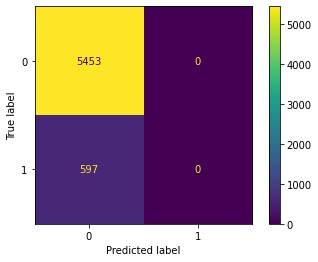

In [241]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=model.classes_)
disp.plot()

plt.show()

In [242]:
# define models and parameters

model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search

grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.898734 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.898734 (0.000146) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.898734 (0.000146) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.898734 (0.000146) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.898734 (0.000146) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.898734 (0.000146) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.898734 (0.000146) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.898734 (0.000146) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.898734 (0.000146) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.898734 (0.000146) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.898734 (0.000146) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.898734 (0.000146) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.898734 (0.000146) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.898734 (0.000146) wit

In [243]:
optimized_model = LogisticRegression(C= 100, penalty='l2', solver= 'newton-cg')

In [244]:
optimized_model.fit(X_train, y_train)

LogisticRegression(C=100, solver='newton-cg')

In [245]:
y_pred_ = optimized_model.predict(X_test)
y_pred_

array([0, 0, 0, ..., 0, 0, 0])

In [246]:

accuracy_score(y_pred_, y_test)

0.9013223140495867

In [247]:
confusion_matrix(y_pred, y_test)


array([[5453,  597],
       [   0,    0]])

In [251]:
# Save best model

pickle.dump(optimized_model, open('../models/best_model_logistic.pickle', 'wb'))

In [252]:
modelo = pickle.load(open('../models/best_model_logistic.pickle', 'rb')) # lo leemos
modelo.predict(X_test) # lo usamos para predecir nueva X_test

array([0, 0, 0, ..., 0, 0, 0])